In [148]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import numpy as np

### Importing the three datasets

In [3]:
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [4]:
rating_df = pd.read_csv('ratings.dat',header=None,delimiter='::',names=rating)
print(rating_df.head())
print()
print(rating_df.shape)

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

(1000209, 4)


In [5]:
user_df = pd.read_csv('users.dat',header=None,delimiter='::',names=user)
print(user_df.head())
print()
print(user_df.shape)

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

(6040, 5)


In [6]:
movie_df = pd.read_csv('movies.dat', delimiter='::', header=None, encoding='ISO-8859-1',names=movie)
print(movie_df.head())
print()
print(movie_df.shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

(3883, 3)


### Merging the three datasets


In [7]:
df = rating_df.merge(user_df,how='outer',on='UserID')
df = df.merge(movie_df,how='outer',on='MovieID')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000209 non-null  float64
 1   MovieID     1000386 non-null  int64  
 2   Rating      1000209 non-null  float64
 3   Timestamp   1000209 non-null  float64
 4   Gender      1000209 non-null  object 
 5   Age         1000209 non-null  float64
 6   Occupation  1000209 non-null  float64
 7   Zip-code    1000209 non-null  object 
 8   Title       1000386 non-null  object 
 9   Genres      1000386 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


<AxesSubplot:>

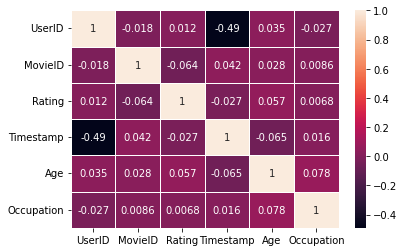

In [9]:
corr = df.corr()
sns.heatmap(corr,annot= True,linewidths=0.5)

In [10]:
df.describe()
pfr = pf.ProfileReport(df)
pfr.to_file('Movielens_pfr.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
print('Na values in the data frame is :')
def is_na(x):
    for i in x.columns:
        print(i,'column',' :',x[i].isna().sum(),'\n')
is_na(df)

Na values in the data frame is :
UserID column  : 177 

MovieID column  : 0 

Rating column  : 177 

Timestamp column  : 177 

Gender column  : 177 

Age column  : 177 

Occupation column  : 177 

Zip-code column  : 177 

Title column  : 0 

Genres column  : 0 



In [12]:
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(df)

Column :  UserID 
 [1.000e+00 2.000e+00 1.200e+01 ... 3.893e+03 4.211e+03       nan] 
 Total unique values is:  6040
----------------------------------------------------------------------
Column :  MovieID 
 [1193  661  914 ... 3829 3856 3907] 
 Total unique values is:  3883
----------------------------------------------------------------------
Column :  Rating 
 [ 5.  4.  3.  2.  1. nan] 
 Total unique values is:  5
----------------------------------------------------------------------
Column :  Timestamp 
 [9.78300760e+08 9.78298413e+08 9.78220179e+08 ... 9.76029116e+08
 9.57273353e+08            nan] 
 Total unique values is:  458455
----------------------------------------------------------------------
Column :  Gender 
 ['F' 'M' nan] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Age 
 [ 1. 56. 25. 50. 18. 45. 35. nan] 
 Total unique values is:  7
----------------------------------------------------------------------
C

## Exploring the datasets using visual representations
### Visualizing the User Age Distribution

<AxesSubplot:>

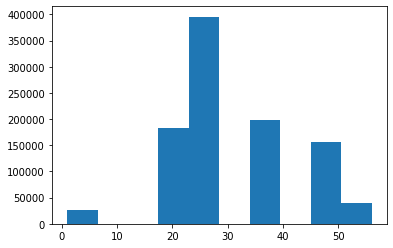

In [13]:
df.Age.hist(grid=False)

## Visualizing User rating of the movie “Toy Story”

In [14]:
def fn(x):
    return re.search("Toy Story".lower(), x.lower())!=None
title = df.iloc[0].Title
title

"One Flew Over the Cuckoo's Nest (1975)"

In [15]:
re_tit = df["Title"].apply(fn)
re_tit.head()

0    False
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [16]:
toystory = df[df["Title"].apply(fn)]
toystory

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1.0,1,5.0,978824268.0,F,1.0,10.0,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6.0,1,4.0,978237008.0,F,50.0,9.0,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8.0,1,4.0,978233496.0,M,25.0,12.0,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9.0,1,5.0,978225952.0,M,25.0,17.0,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10.0,1,5.0,978226474.0,F,35.0,1.0,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022.0,3114,5.0,956755741.0,M,25.0,17.0,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024.0,3114,4.0,956749447.0,M,25.0,12.0,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027.0,3114,4.0,956726766.0,M,18.0,4.0,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036.0,3114,4.0,956710231.0,F,25.0,15.0,32603,Toy Story 2 (1999),Animation|Children's|Comedy


<AxesSubplot:>

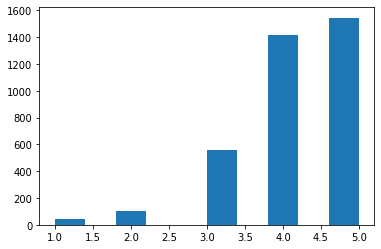

In [17]:
toystory.Rating.hist(grid=False)

In [18]:
top_25 = df.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending=False)
top_25

MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
                                                                  ... 
3356     Condo Painting (2000)                                       0
1109     Charm's Incidents (1996)                                    0
1847     Ratchet (1996)                                              0
2680     Floating (1997)                                             0
1448     Fire on the Mountain (1996)                                 0
Name: Timestamp, Length: 3883, dtype: int64

### The ratings for all the movies reviewed by for a particular user of user id = 2696

In [19]:
userId = 2696
userRatingById = df[df["UserID"] == userId]
userRatingById[['Rating']]

,Rating
24345,2.0
29848,3.0
244232,4.0
250014,5.0
273633,1.0
277808,4.0
371178,4.0
377250,3.0
598042,4.0
603189,4.0


<AxesSubplot:>

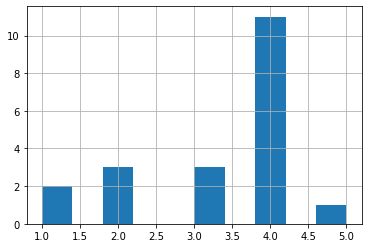

In [20]:
df.loc[df["UserID"] == 2696, "Rating"].hist()

In [21]:
df.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [22]:
Genres_list = df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1

In [23]:
unique_gen = list(set(genre_list))
print(unique_gen)
print()
print("Length of the unique Genre : ",len(unique_gen))

['Western', 'Documentary', 'Animation', 'Adventure', 'Crime', 'Musical', 'Horror', 'Romance', "Children's", 'Drama', 'Comedy', 'Action', 'Sci-Fi', 'Mystery', 'Fantasy', 'Film-Noir', 'War', 'Thriller']

Length of the unique Genre :  18


## Creating a separate column for each genre category with a one-hot encoding ( 1 and 0)

In [24]:
new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [25]:
new_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


## Determine the features affecting the ratings of any particular movie.

In [27]:
dfMaster = new_data 

In [28]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [29]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,1975
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,1975
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,1975
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,1975
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,1975


In [30]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   UserID       1000209 non-null  float64
 1   MovieID      1000386 non-null  int64  
 2   Rating       1000209 non-null  float64
 3   Timestamp    1000209 non-null  float64
 4   Gender       1000209 non-null  object 
 5   Age          1000209 non-null  float64
 6   Occupation   1000209 non-null  float64
 7   Zip-code     1000209 non-null  object 
 8   Title        1000386 non-null  object 
 9   Genres       1000386 non-null  object 
 10  Action       1000386 non-null  int64  
 11  Adventure    1000386 non-null  int64  
 12  Animation    1000386 non-null  int64  
 13  Children's   1000386 non-null  int64  
 14  Comedy       1000386 non-null  int64  
 15  Crime        1000386 non-null  int64  
 16  Documentary  1000386 non-null  int64  
 17  Drama        1000386 non-null  int64  
 18  Fa

In [32]:
dfMaster['Year'].isnull().sum()

1

In [ ]:
dfMaster.drop((df[dfMaster['Year'] == np.nan]).index,axis = 1)

In [45]:
n_index = dfMaster.loc[dfMaster.Year.isnull()].index[0]
print(n_index)

1000260


In [46]:
dfMaster.drop(n_index, inplace = True)

In [47]:
dfMaster['Year'].isnull().sum()

0

In [49]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [50]:
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25


In [51]:
dfMaster['Gender'] = dfMaster["Gender"].str.replace('F','1')

In [52]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','0')

In [55]:
dfMaster['Gender'].isnull().sum()

176

In [58]:
g_index = dfMaster.loc[dfMaster.Gender.isnull()].index
print(g_index)

Int64Index([1000209, 1000210, 1000211, 1000212, 1000213, 1000214, 1000215,
            1000216, 1000217, 1000218,
            ...
            1000376, 1000377, 1000378, 1000379, 1000380, 1000381, 1000382,
            1000383, 1000384, 1000385],
           dtype='int64', length=176)


In [59]:
dfMaster.drop(g_index, inplace = True)

In [60]:
dfMaster['Gender'] = dfMaster.Gender.astype(int)

In [61]:
dfMaster.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1.0,1193,5.0,978300760.0,1,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
1,2.0,1193,5.0,978298413.0,0,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
2,12.0,1193,4.0,978220179.0,0,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
3,15.0,1193,4.0,978199279.0,0,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
4,17.0,1193,5.0,978158471.0,0,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25


In [62]:
dfMaster.shape

(1000209, 30)

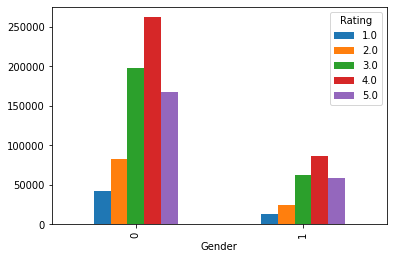

In [87]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

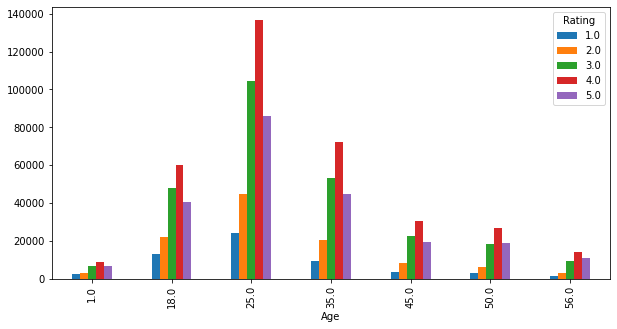

In [111]:
plt.rcParams['figure.figsize'] = [10, 5]
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

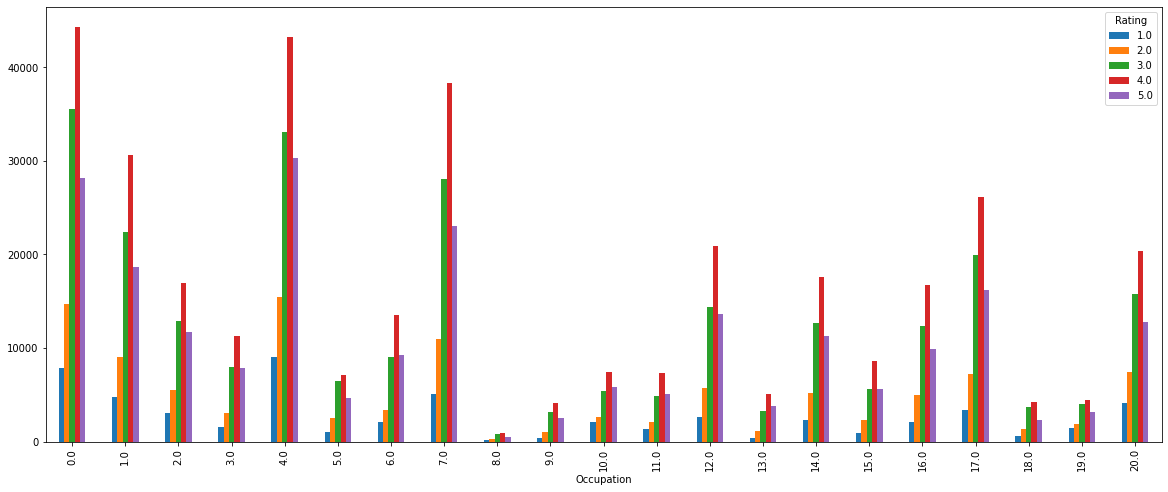

In [104]:
plt.rcParams['figure.figsize'] = [20, 8]
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

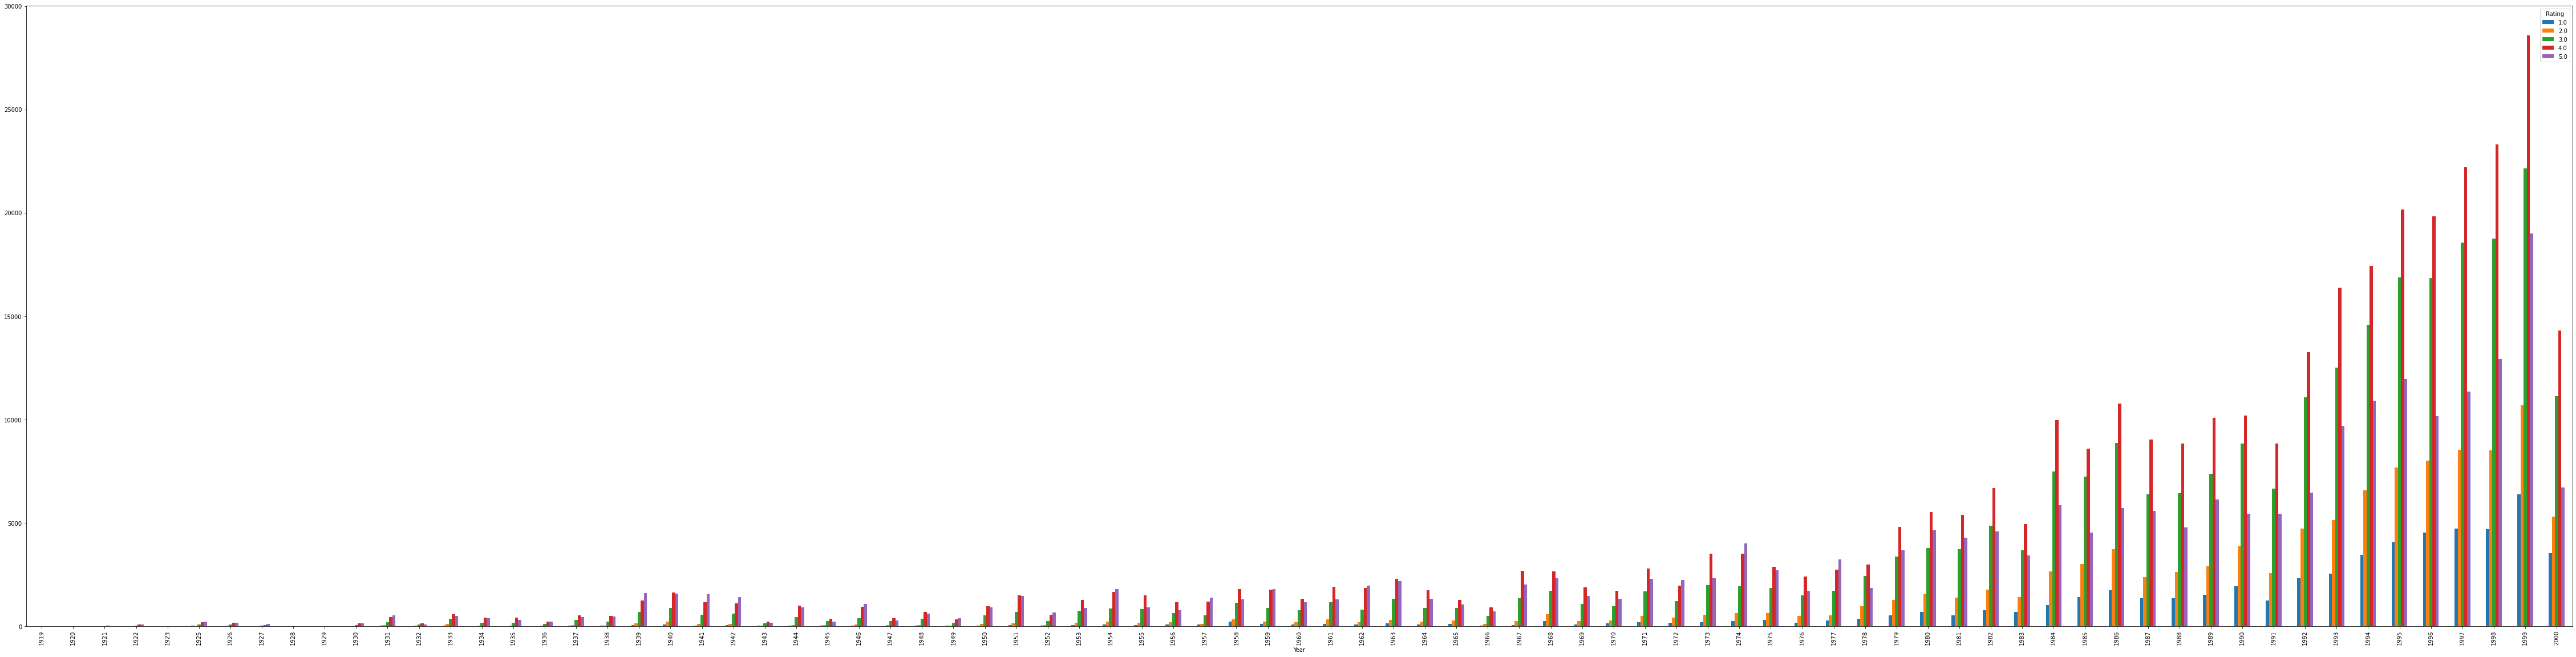

In [110]:
plt.rcParams['figure.figsize'] = [80, 20]
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

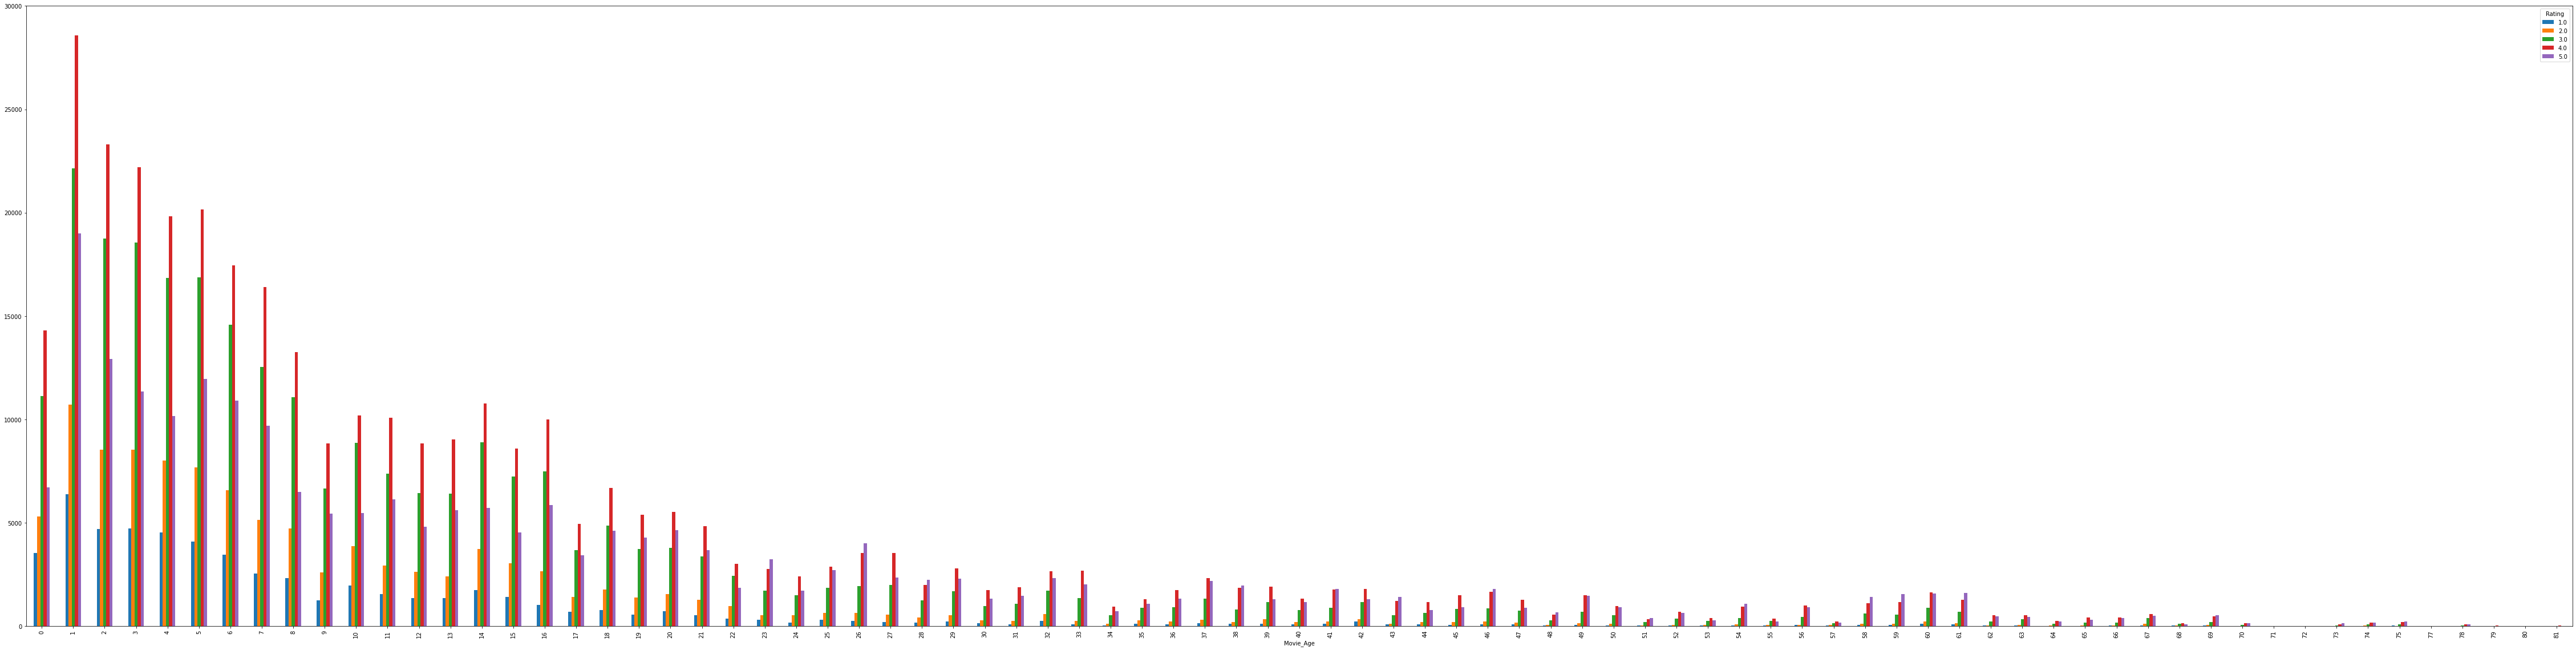

In [113]:
plt.rcParams['figure.figsize'] = [80, 20]
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

## Develop an appropriate model to predict the movie ratings

In [116]:
#First 1000 extracted records
first_1000 = dfMaster[:1000]

In [117]:
first_1000

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1.0,1193,5.0,978300760.0,1,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
1,2.0,1193,5.0,978298413.0,0,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
2,12.0,1193,4.0,978220179.0,0,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
3,15.0,1193,4.0,978199279.0,0,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
4,17.0,1193,5.0,978158471.0,0,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3592.0,1193,5.0,966645044.0,1,56.0,2.0,99701,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
996,3594.0,1193,4.0,966633918.0,0,1.0,0.0,02322,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
997,3596.0,1193,5.0,966631494.0,1,35.0,4.0,19104,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25
998,3600.0,1193,5.0,966622931.0,0,35.0,20.0,94506,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,1975,25


In [137]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [138]:
#Use rating as label
labels = first_500[['Rating']].values

In [139]:
features

array([[1.193e+03, 1.000e+00, 1.000e+01],
       [1.193e+03, 5.600e+01, 1.600e+01],
       [1.193e+03, 2.500e+01, 1.200e+01],
       ...,
       [1.193e+03, 3.500e+01, 4.000e+00],
       [1.193e+03, 3.500e+01, 2.000e+01],
       [1.193e+03, 3.500e+01, 3.000e+00]])

In [140]:
labels

array([[5.],
       [5.],
       [4.],
       [4.],
       [5.],
       [4.],
       [5.],
       [5.],
       [3.],
       [5.],
       [5.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [3.],
       [2.],
       [5.],
       [2.],
       [5.],
       [2.],
       [5.],
       [5.],
       [5.],
       [4.],
       [4.],
       [4.],
       [5.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [3.],
       [4.],
       [5.],
       [4.],
       [4.],
       [1.],
       [5.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [4.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [4.],
       [5.],
       [4.],
       [5.],
       [5.],

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [143]:
train

array([[1.193e+03, 3.500e+01, 1.000e+00],
       [1.193e+03, 5.000e+01, 1.600e+01],
       [1.193e+03, 2.500e+01, 1.700e+01],
       ...,
       [1.193e+03, 2.500e+01, 6.000e+00],
       [1.193e+03, 3.500e+01, 1.000e+00],
       [1.193e+03, 2.500e+01, 3.000e+00]])

In [144]:
test

array([[1.193e+03, 3.500e+01, 7.000e+00],
       [1.193e+03, 2.500e+01, 0.000e+00],
       [1.193e+03, 2.500e+01, 7.000e+00],
       [1.193e+03, 2.500e+01, 1.800e+01],
       [1.193e+03, 5.000e+01, 1.600e+01],
       [1.193e+03, 5.000e+01, 6.000e+00],
       [1.193e+03, 5.600e+01, 7.000e+00],
       [1.193e+03, 5.000e+01, 2.000e+00],
       [1.193e+03, 3.500e+01, 1.600e+01],
       [1.193e+03, 3.500e+01, 1.400e+01],
       [1.193e+03, 2.500e+01, 4.000e+00],
       [1.193e+03, 5.600e+01, 1.000e+00],
       [1.193e+03, 5.000e+01, 6.000e+00],
       [1.193e+03, 1.800e+01, 1.200e+01],
       [1.193e+03, 3.500e+01, 1.000e+00],
       [1.193e+03, 3.500e+01, 7.000e+00],
       [1.193e+03, 4.500e+01, 1.700e+01],
       [1.193e+03, 3.500e+01, 1.000e+00],
       [1.193e+03, 2.500e+01, 7.000e+00],
       [1.193e+03, 5.600e+01, 1.600e+01],
       [1.193e+03, 2.500e+01, 7.000e+00],
       [1.193e+03, 1.800e+01, 2.000e+01],
       [1.193e+03, 3.500e+01, 6.000e+00],
       [1.193e+03, 2.500e+01, 1.40

In [145]:
train_labels

array([[4.],
       [1.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [3.],
       [5.],
       [4.],
       [3.],
       [5.],
       [5.],
       [4.],
       [5.],
       [4.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [2.],
       [5.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [3.],
       [4.],
       [2.],
       [3.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [4.],
       [4.],
       [5.],
       [3.],
       [5.],
       [4.],
       [5.],
       [4.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [3.],
       [4.],
       [4.],
       [4.],

In [146]:
test_labels

array([[4.],
       [4.],
       [3.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [5.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [4.],
       [4.],
       [4.],
       [5.],
       [4.],
       [5.],
       [3.],
       [5.],
       [5.],
       [5.],
       [3.],
       [3.],
       [5.],
       [4.],
       [5.],
       [5.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [3.],
       [4.],
       [5.],
       [5.],
       [4.],
       [3.],
       [4.],
       [5.],
       [4.],
       [5.],
       [5.],
       [5.],
       [3.],
       [4.],
       [5.],
       [5.],
       [5.],

In [149]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

53.58

In [150]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

53.58

In [151]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

48.96

In [152]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

53.58

In [153]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

33.88

In [154]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

13.13

In [155]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

53.58

In [156]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

59.4

In [157]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

59.4

In [158]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,59.40
8,Decision Tree,59.40
0,Support Vector Machines,53.58
2,Logistic Regression,53.58
4,Naive Bayes,53.58
6,Stochastic Gradient Decent,53.58
1,KNN,48.96
5,Perceptron,33.88
7,Linear SVC,13.13
